In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs, json
import tempfile
import requests
import base64
file_path = r"C:\Users\asus\Downloads\city_day.csv"
my_df = pd.read_csv(file_path)
print('The shape of our dataset is ', my_df.shape)
my_df.head()

The shape of our dataset is  (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0

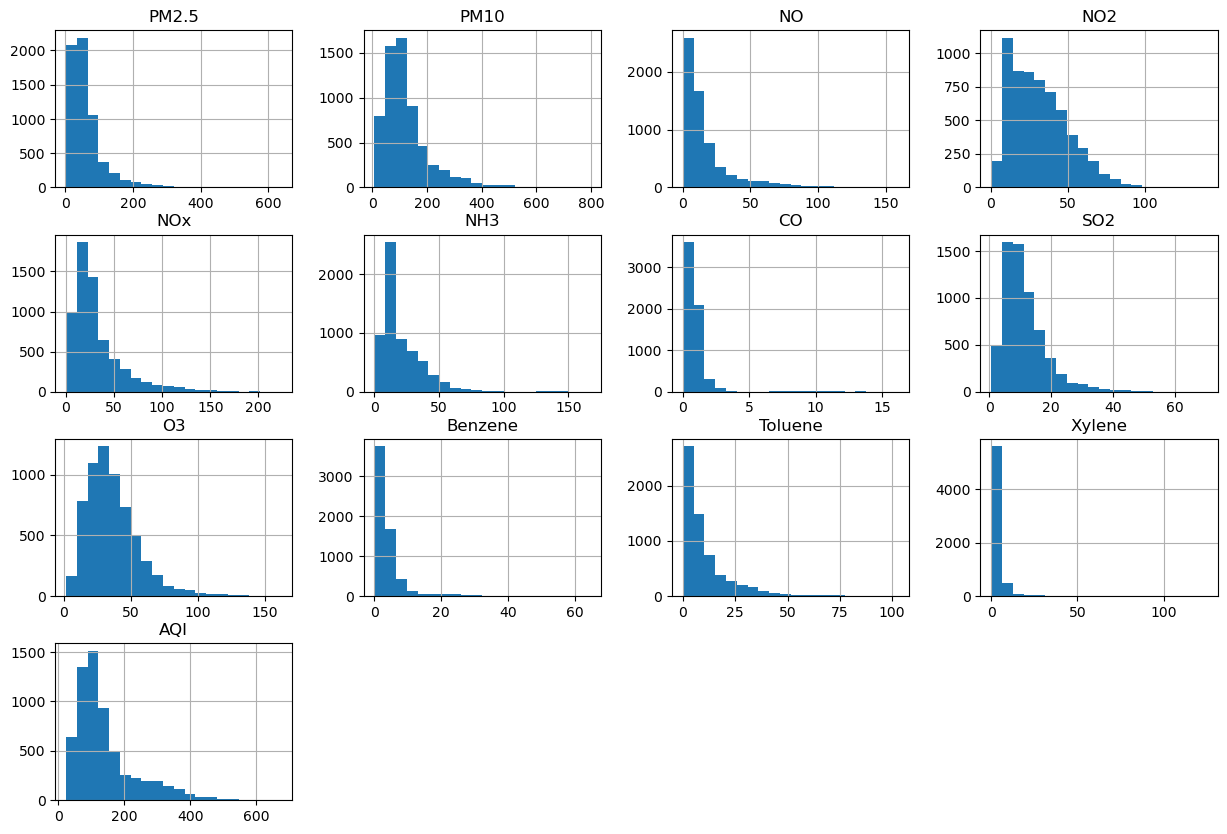

Model: Linear Regression
Cross Validation Scores: [0.9050706  0.91075239 0.89913003 0.91391637 0.91290218]
Mean Cross Validation Score: 0.908354314198563
Mean Squared Error: 651.3567823009205
Mean Absolute Error: 18.15346862546096
R-squared: 0.9217139055744001


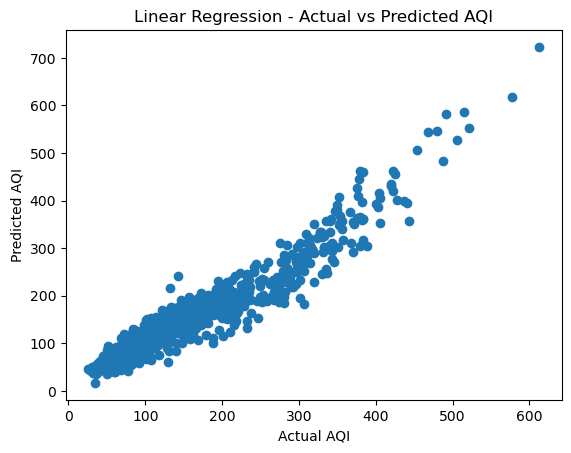

Model: Random Forest
Cross Validation Scores: [0.93045401 0.94323235 0.93354215 0.94551364 0.94850635]
Mean Cross Validation Score: 0.9402497010870118
Mean Squared Error: 423.7026379006411
Mean Absolute Error: 13.863165064102564
R-squared: 0.9490754903911616


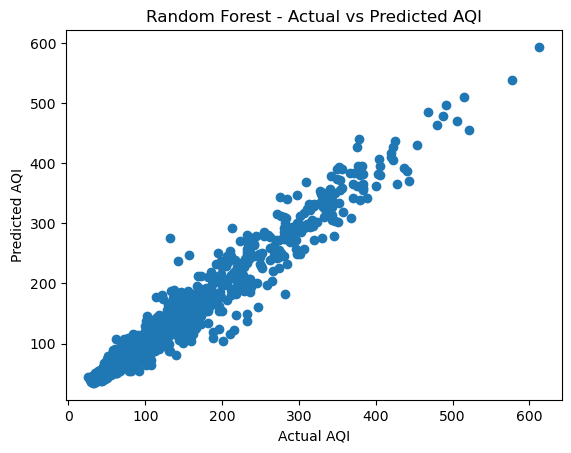

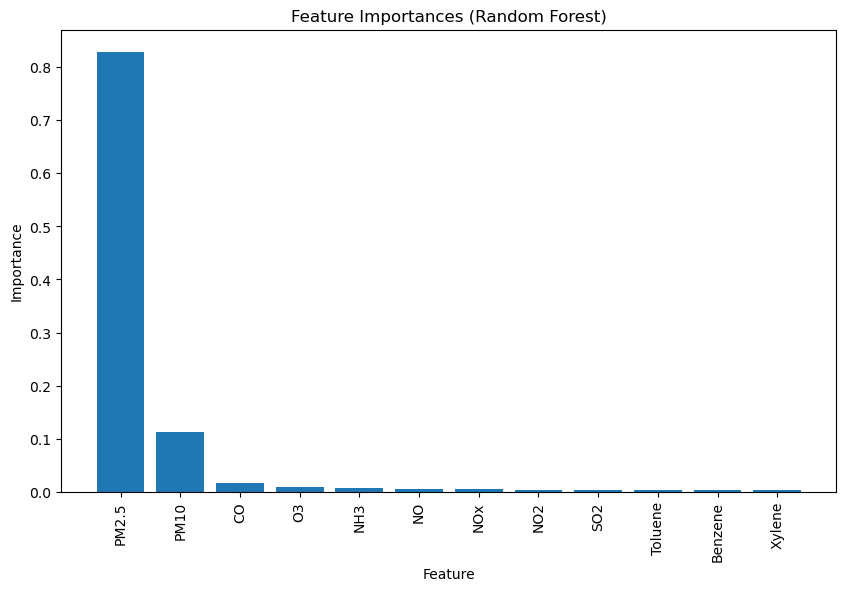

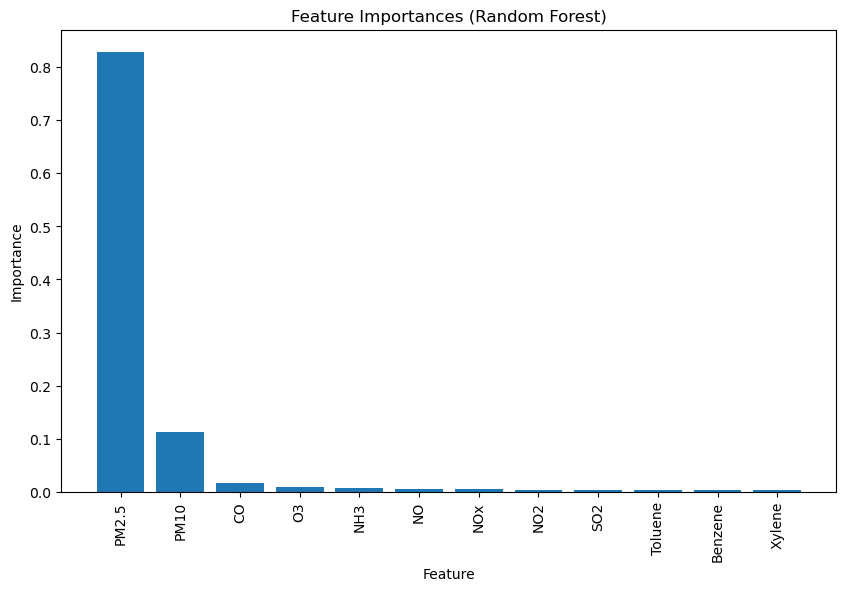

Model: Decision Tree
Cross Validation Scores: [0.87855067 0.86904134 0.87784926 0.90349438 0.87796989]
Mean Cross Validation Score: 0.8813811076451084
Mean Squared Error: 886.8982371794872
Mean Absolute Error: 20.015224358974358
R-squared: 0.8934043506901651


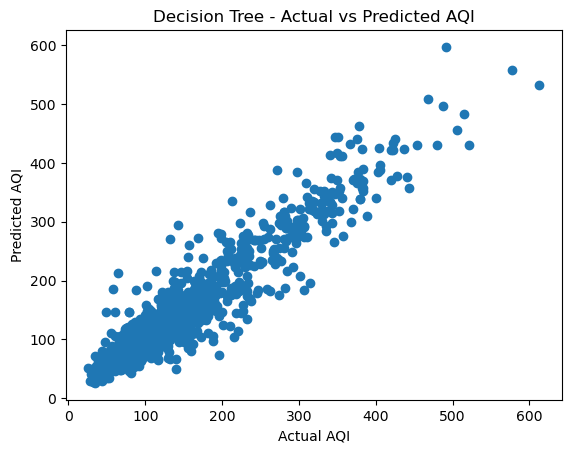

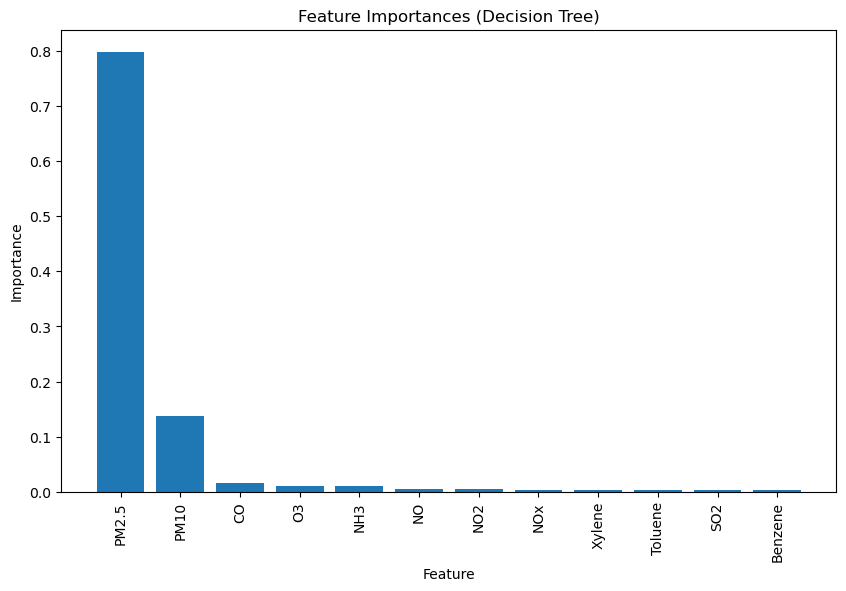

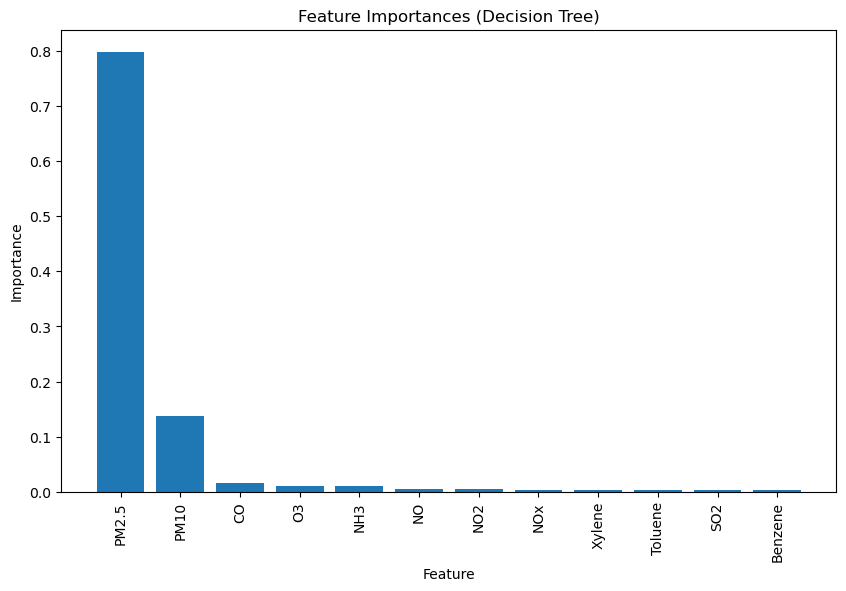

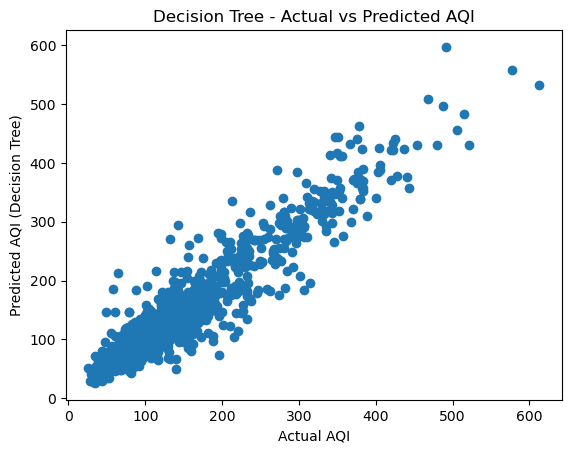

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Step 1: Data Acquisition
data = pd.read_csv( r"C:\Users\asus\Downloads\city_day.csv")

# Step 2: Data Cleaning
data = data.dropna()

# Step 3: Exploratory Data Analysis
print(data.describe())
data.hist(bins=20, figsize=(15,10))
plt.show()

# Step 4: Feature Identification
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'


# Step 6: Data Splitting
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Step 8: Model Training and Evaluation
for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross Validation Scores: {scores}")
    print(f"Mean Cross Validation Score: {np.mean(scores)}")
    
    # Step 9: Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    
    # Step 10: Visualization of Predictions
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'{name} - Actual vs Predicted AQI')
    plt.show()
    
    # Step 11: Model Interpretation (not implemented here)

    # Step 12: Feature Importance Visualization (for Random Forest and Decision Tree)
    if name in ['Random Forest', 'Decision Tree']:
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
        plt.xticks(range(X.shape[1]), np.array(features)[sorted_indices], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importances ({name})')
        plt.show()
        
    if name in ['Random Forest', 'Decision Tree']:
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
        plt.xticks(range(X.shape[1]), np.array(features)[sorted_indices], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importances ({name})')
        plt.show()
    
    # Additional plot for Decision Tree
    if name == 'Decision Tree':
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual AQI')
        plt.ylabel('Predicted AQI (Decision Tree)')
        plt.title('Decision Tree - Actual vs Predicted AQI')
        plt.show()

             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0

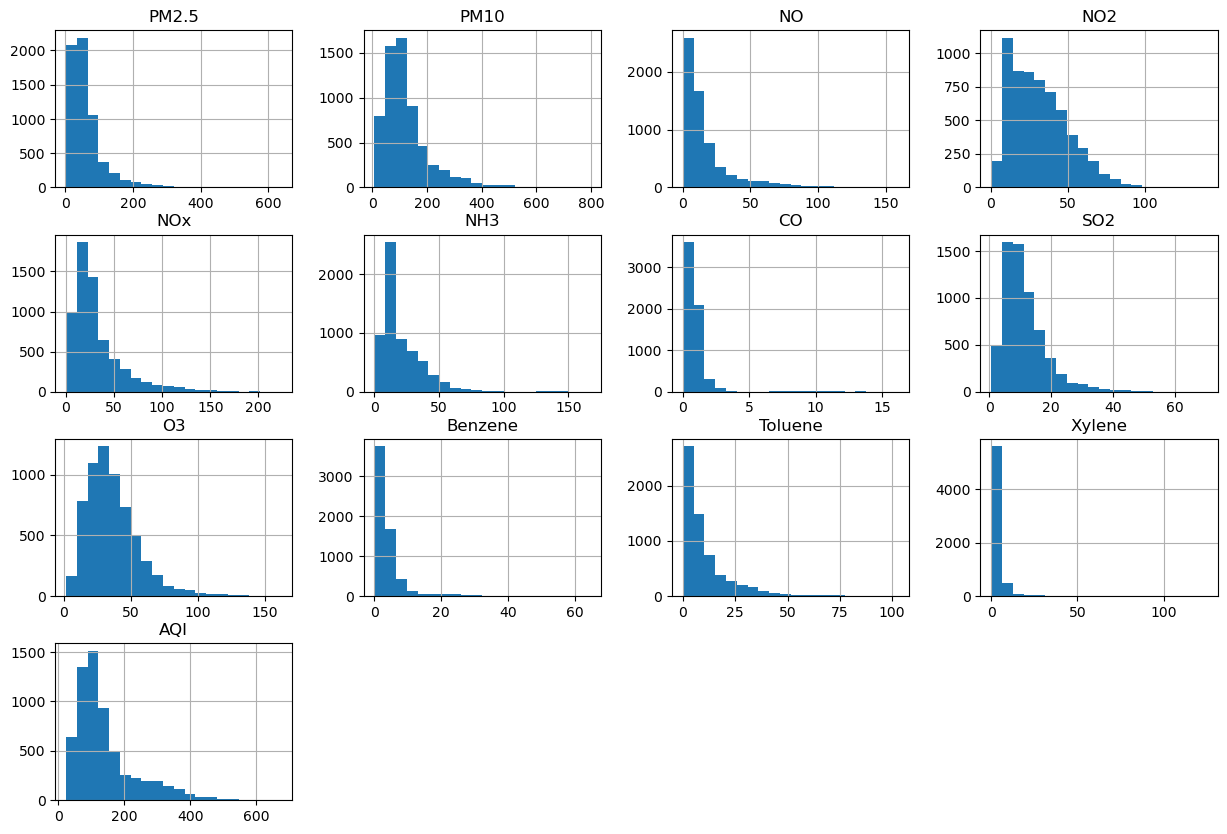

Model: Random Forest
Cross Validation Scores: [0.93045401 0.94323235 0.93354215 0.94551364 0.94850635]
Mean Cross Validation Score: 0.9402497010870118
Mean Squared Error: 423.7026379006411
Mean Absolute Error: 13.863165064102564
R-squared: 0.9490754903911616


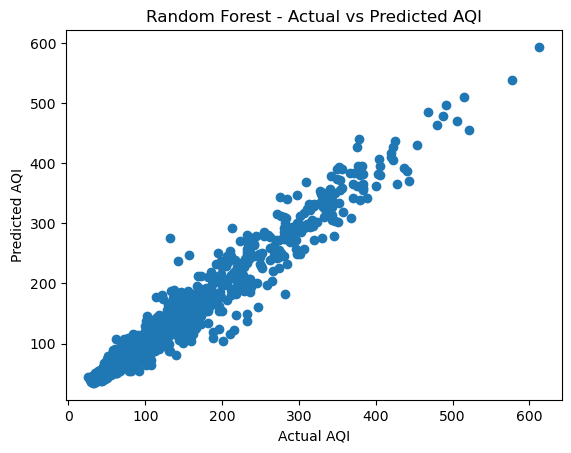

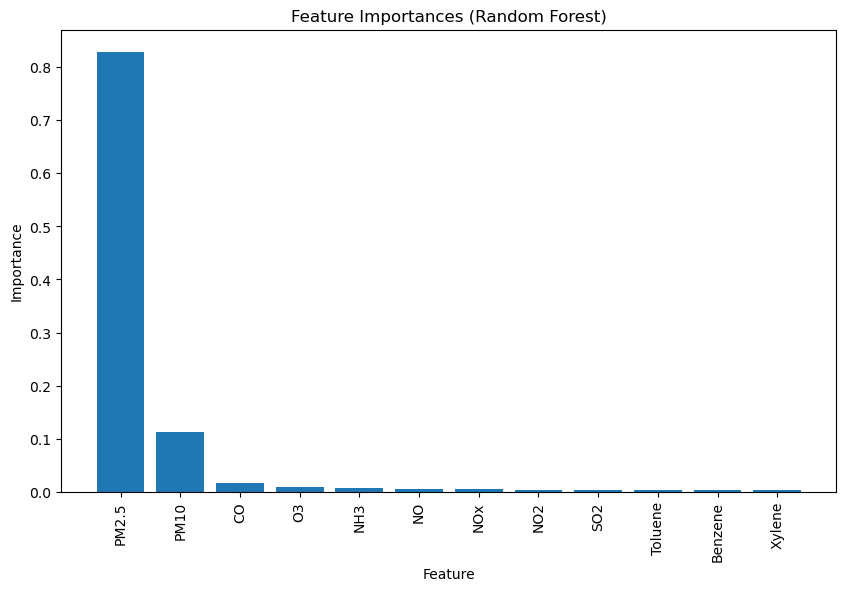

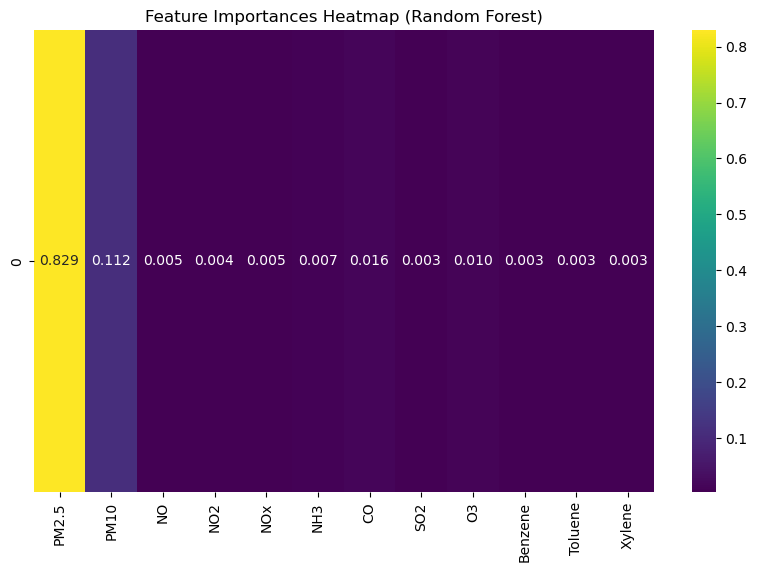

Model: Decision Tree
Cross Validation Scores: [0.87855067 0.86904134 0.87784926 0.90349438 0.87796989]
Mean Cross Validation Score: 0.8813811076451084
Mean Squared Error: 886.8982371794872
Mean Absolute Error: 20.015224358974358
R-squared: 0.8934043506901651


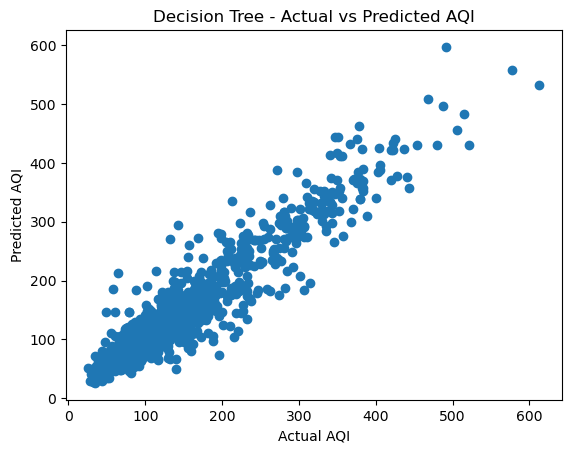

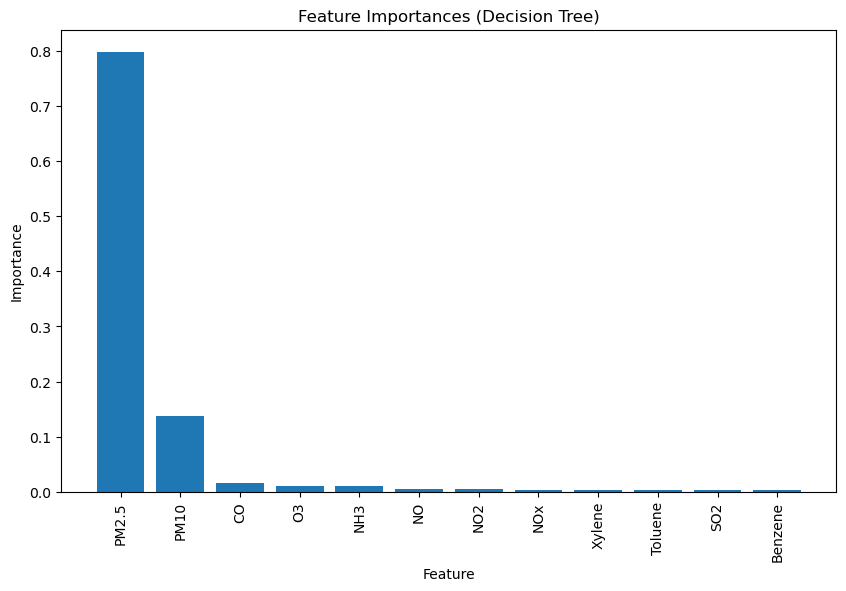

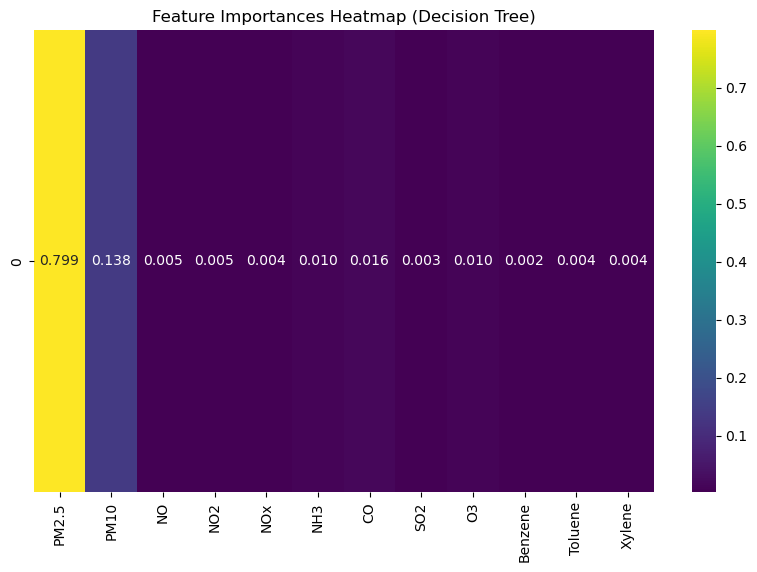

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
# Step 1: Data Acquisition
data = pd.read_csv(r"C:\Users\asus\Downloads\city_day.csv")

# Step 2: Data Cleaning
data = data.dropna()

# Step 3: Exploratory Data Analysis
print(data.describe())
data.hist(bins=20, figsize=(15,10))
plt.show()

# Step 4: Feature Identification
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Step 5: Feature Engineering (if necessary)

# Step 6: Data Splitting
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Selection
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Step 8: Model Training and Evaluation
for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross Validation Scores: {scores}")
    print(f"Mean Cross Validation Score: {np.mean(scores)}")
    
    # Step 9: Model Evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    
    # Step 10: Visualization of Predictions (Scatter Plot)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'{name} - Actual vs Predicted AQI')
    plt.show()
    
    # Step 11: Model Interpretation (not implemented here)

    # Step 12: Feature Importance Visualization (Heatmap)
    if name in ['Random Forest', 'Decision Tree']:
        feature_importances = model.feature_importances_
        sorted_indices = np.argsort(feature_importances)[::-1]
        sorted_features = np.array(features)[sorted_indices]
        importance_sorted = feature_importances[sorted_indices]
        plt.figure(figsize=(10, 6))
        plt.bar(range(X.shape[1]), importance_sorted, align='center')
        plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importances ({name})')
        plt.show()
        
        # Heatmap for feature importances
        plt.figure(figsize=(10, 6))
        importance_matrix = pd.DataFrame(data=feature_importances.reshape(1, -1), columns=features)
        sns.heatmap(importance_matrix, cmap='viridis', annot=True, fmt=".3f")
        plt.title(f'Feature Importances Heatmap ({name})')
        plt.show()
